In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras

In [2]:
path=".//HinhAnh//"
categories = ['PC_BHA','PC_Retinol','Simple_TayTrang','Simple_Toner','Skin1004_KCN','Skin1004_KemDuong','Skin1004_Toner','SkinAqua_KCN']

In [3]:
data = []#dữ liệu
labels = []#nhãn
imagePaths = []
HEIGHT = 128
WIDTH = 128
# 24 24
N_CHANNELS = 3

In [4]:
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) 

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

[['.//HinhAnh//Skin1004_Toner/Toner_Skin1004_41.jpg', 6], ['.//HinhAnh//PC_Retinol/PaulaRetinol_26.jpg', 1], ['.//HinhAnh//Skin1004_KCN/vn-11134103-22090-yotpuyai2ohved.jpg', 4], ['.//HinhAnh//Simple_TayTrang/vn-11134103-23020-0zo2z5bwarnv65.jpg', 2], ['.//HinhAnh//Simple_TayTrang/simple (28).jpg', 2], ['.//HinhAnh//Simple_Toner/21d41fbc23e23b91c9f3ec33cb022007.jpg', 3], ['.//HinhAnh//Skin1004_KCN/vn-11134103-23030-wnx0tuchboov45.jpg', 4], ['.//HinhAnh//Simple_TayTrang/vn-11134103-23020-8scpk3baybnv4b.jpg', 2], ['.//HinhAnh//Skin1004_Toner/143c80343423b43a2d2e517ed7fd44ed.jpg', 6], ['.//HinhAnh//SkinAqua_KCN/SkinaquaKCN (10).jpg', 7]]


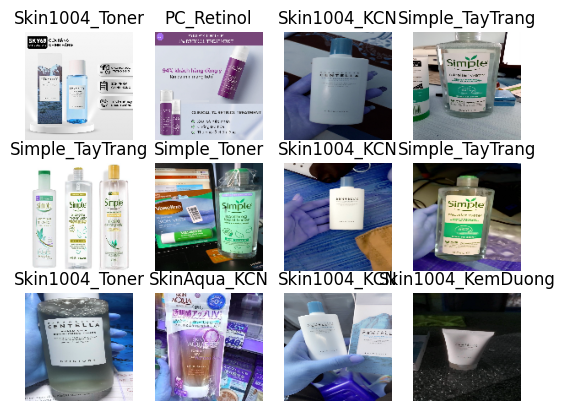

In [5]:
for imagePath in imagePaths:
    # print(imagePath)
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image,(WIDTH, HEIGHT)) #.flatten()
    data.append(image)
    label = imagePath[1]
    labels.append(label)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
# plt.show()

In [6]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)# random_state=30)

trainY = np_utils.to_categorical(trainY, len(categories))

In [7]:
EPOCHS = 20
INIT_LR = 1e-3
BS = 10
#--------------------------------------------
class_names = categories

In [9]:
from tensorflow.keras.applications import InceptionV3,MobileNet,VGG16,DenseNet121,EfficientNetB7,Xception#,DenseNet#EfficientNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras import layers
from keras import models

In [10]:
print("[INFO] compiling model...")
Xception = Xception(input_shape=(WIDTH, HEIGHT, N_CHANNELS), include_top=False, weights='imagenet')
for layer in Xception.layers:
    layer.trainable = False

model = Sequential()
model.add(Xception)
#model.add(layers.AveragePooling2D((8, 8), padding='valid', name='avg_pool'))
model.add(GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(len(class_names), activation='softmax'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

[INFO] compiling model...
83683744/83683744 [==============================] - 37s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 8)                 16392     
                                                                 
Total params: 20,877,872
Train

In [11]:
#Training
model.fit(trainX, trainY, batch_size=BS, epochs=EPOCHS, verbose=1)

Epoch 1/20
160/160 [==============================] - 32s 178ms/step - loss: 1.2611 - accuracy: 0.5430
Epoch 2/20
160/160 [==============================] - 29s 179ms/step - loss: 0.6872 - accuracy: 0.7583
Epoch 3/20
160/160 [==============================] - 28s 175ms/step - loss: 0.5500 - accuracy: 0.8004
Epoch 4/20
160/160 [==============================] - 28s 174ms/step - loss: 0.4459 - accuracy: 0.8443
Epoch 5/20
160/160 [==============================] - 29s 180ms/step - loss: 0.3998 - accuracy: 0.8632
Epoch 6/20
160/160 [==============================] - 28s 174ms/step - loss: 0.3367 - accuracy: 0.8858
Epoch 7/20
160/160 [==============================] - 28s 177ms/step - loss: 0.3361 - accuracy: 0.8801
Epoch 8/20
160/160 [==============================] - 29s 180ms/step - loss: 0.3119 - accuracy: 0.8895
Epoch 9/20
160/160 [==============================] - 29s 184ms/step - loss: 0.2680 - accuracy: 0.9109
Epoch 10/20
160/160 [==============================] - 28s 177ms/step - l

13/13 [==============================] - 5s 384ms/step


C:\Users\Chikuka\AppData\Local\Temp\ipykernel_27064\3362605127.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + categories)
C:\Users\Chikuka\AppData\Local\Temp\ipykernel_27064\3362605127.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + categories)


Text(0, 0.5, 'True')

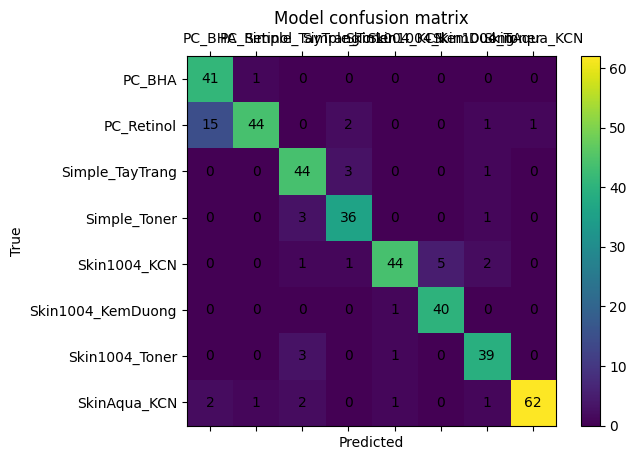

In [14]:
# ----------------------------danh gia mo hinh---------------------------------
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
# plt.show()

In [13]:
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))
print("\n")
# ----------------------------------------------

recall= recall_score(testY, predictions,average='weighted')
print("Recall :%.2f%%" % (recall*100))
print("\n")
# ----------------------------------------------

precision = precision_score(testY, predictions,average='weighted')
print("Precision : %.2f%%" % (precision*100.0))
print("\n")
# ----------------------------------------------

f1 = f1_score(testY, predictions,average='weighted')
print("F1 : %.2f%%" % (f1*100.0))
print("\n")

Accuracy : 87.72%


Recall :87.72%


Precision : 89.05%


F1 : 87.71%


